In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

%matplotlib inline

quakes = pd.read_csv("./data/disaster.csv")

print quakes.columns
print quakes.describe()
print len(quakes)

Index([u'I_D', u'FLAG_TSUNAMI', u'YEAR', u'MONTH', u'DAY', u'HOUR', u'MINUTE',
       u'SECOND', u'FOCAL_DEPTH', u'EQ_PRIMARY', u'EQ_MAG_MW', u'EQ_MAG_MS',
       u'EQ_MAG_MB', u'EQ_MAG_ML', u'EQ_MAG_MFA', u'EQ_MAG_UNK', u'INTENSITY',
       u'COUNTRY', u'STATE', u'LOCATION_NAME', u'LATITUDE', u'LONGITUDE',
       u'REGION_CODE', u'DEATHS', u'DEATHS_DESCRIPTION', u'MISSING',
       u'MISSING_DESCRIPTION', u'INJURIES', u'INJURIES_DESCRIPTION',
       u'DAMAGE_MILLIONS_DOLLARS', u'DAMAGE_DESCRIPTION', u'HOUSES_DESTROYED',
       u'HOUSES_DESTROYED_DESCRIPTION', u'HOUSES_DAMAGED',
       u'HOUSES_DAMAGED_DESCRIPTION', u'TOTAL_DEATHS',
       u'TOTAL_DEATHS_DESCRIPTION', u'TOTAL_MISSING',
       u'TOTAL_MISSING_DESCRIPTION', u'TOTAL_INJURIES',
       u'TOTAL_INJURIES_DESCRIPTION', u'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       u'TOTAL_DAMAGE_DESCRIPTION', u'TOTAL_HOUSES_DESTROYED',
       u'TOTAL_HOUSES_DESTROYED_DESCRIPTION', u'TOTAL_HOUSES_DAMAGED',
       u'TOTAL_HOUSES_DAMAGED_DESCRIPTION', 

In [16]:
quakes.LATITUDE.dropna()
quakes.LONGITUDE.dropna()



0             AL-KARAK
1                   38
2               35.683
3                 36.4
4                 31.5
5                 35.5
6               35.683
7                   32
8                 29.6
9                   33
10               33.27
11                  37
12       SAYDA (SAIDA)
13                37.9
14                39.7
15                  37
16                38.9
17         EIVAN-E-KAY
18               38.25
19                  35
20                  40
21                  23
22                38.5
23                  41
24                42.7
25                36.3
26                 NaN
27               LIBYA
28                36.2
29               GAULE
             ...      
5846            -5.465
5847            27.837
5848            27.831
5849              DATU
5850            26.642
5851            37.468
5852            -9.303
5853           -10.444
5854            33.884
5855            52.376
5856            -2.683
5857             8.237
5858       

TypeError: input must be an array, list, tuple or scalar

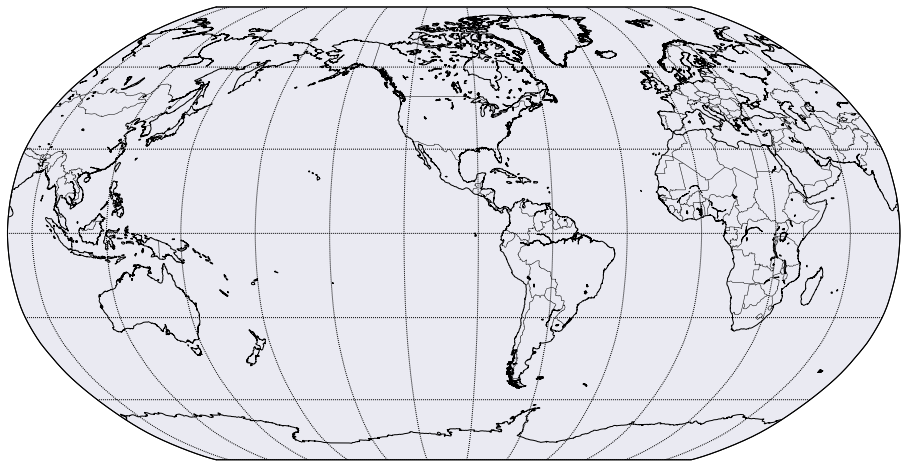

In [18]:
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(16,12))

my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

lats = np.array(quakes.LATITUDE)
longs = np.array(quakes.LONGITUDE)
mags = np.array(quakes.EQ_MAG_MS)
# depths = np.array(quakes.depth)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
#     marker_string = get_marker_color(mag)
    my_map.plot(x, y, 'ro', markersize=5)
    
plt.title('Earthquakes')
plt.show()

In [9]:
print quakes.groupby('TOTAL_DEATHS').mean()

                      I_D         YEAR      MONTH        DAY       HOUR  \
TOTAL_DEATHS                                                              
1             6551.924419  1949.273256   6.964706  15.905325  10.850932   
2             5863.537879  1960.613636   6.496183  14.469231  11.230769   
3             5144.110236  1906.984252   6.382114  15.206612  10.600000   
4             5401.933333  1937.622222   5.943820  16.786517  10.937500   
5             5676.869565  1949.913043   5.956522  16.086957  11.523810   
6             6124.466667  1959.400000   8.733333  12.785714  12.928571   
7             6156.947368  1948.473684   6.684211  14.000000  11.642857   
8             6227.000000  1957.000000   7.411765  17.058824   8.866667   
9             5839.800000  1928.400000   6.900000  16.900000   9.222222   
10            6469.888889  1929.666667   7.000000  14.000000  13.062500   
11            5087.866667  1898.200000   7.500000  11.428571  13.583333   
12            3984.200000